# shapefiles and libraries:

In [ ]:
!pip install python-igraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 28.4 MB/s eta 0:00:00


In [ ]:
!pip install contextily

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 48.5 MB/s eta 0:00:00


In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np
import geopandas as gpd
import zipfile
import io
from shapely.geometry import Point
import os
import datetime as dt
import itertools
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
from dateutil.relativedelta import relativedelta
import igraph
from shapely.geometry import LineString
from geopy.distance import great_circle
import statsmodels.api as sm

In [ ]:
uploaded = files.upload()
zip_file_name = list(uploaded.keys())[0]
zip_content = uploaded[zip_file_name]

with zipfile.ZipFile(io.BytesIO(zip_content), 'r') as zip_ref:
    temp_dir = '/content/temp_extract'
    zip_ref.extractall(temp_dir)

shapefile_path = f'{temp_dir}/stations.shp'
gdfStations = gpd.read_file(shapefile_path)

Saving stations.zip to stations.zip


In [ ]:
gdfStations.head()

,id,opening,comment,name,opening_d,loc_exact,closing,geometry
0,NaN,1852,NaN,Mühlhausen in Ostpreußen,NaN,1.0,2015.0,POINT (19.74561 54.18642)
1,NaN,1852,NaN,Braunsberg,NaN,1.0,2019.0,POINT (19.84215 54.38095)
2,NaN,1853,NaN,Heiligenbeil,NaN,NaN,NaN,POINT (19.93482 54.46413)
3,NaN,1853,NaN,Königsberg in Preußen,NaN,NaN,NaN,POINT (20.49867 54.69327)
4,NaN,1860,NaN,Tapiau,NaN,1.0,NaN,POINT (21.06883 54.63585)


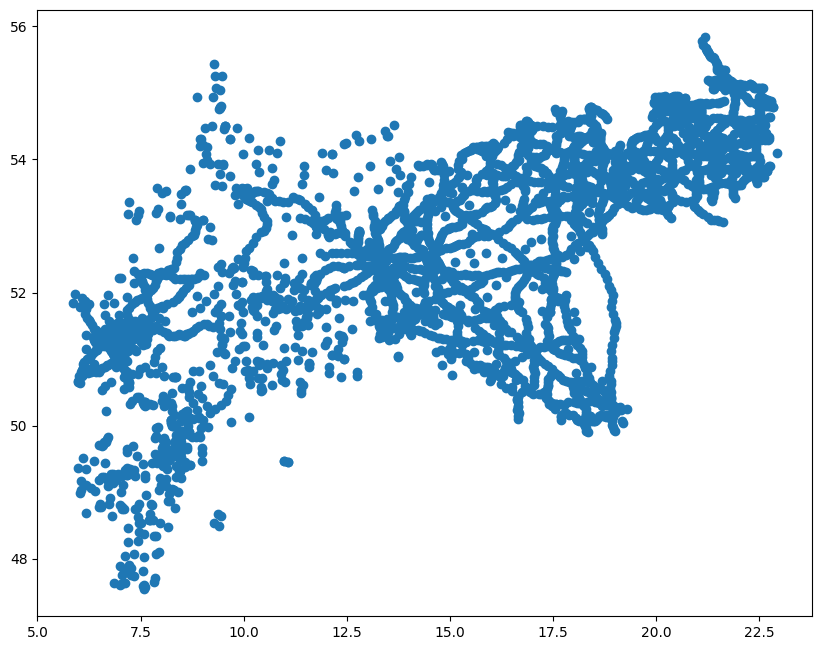

In [ ]:
gdfStations.plot(figsize=(10, 10))
plt.show()

In [ ]:
uploaded = files.upload()
zip_file_name = list(uploaded.keys())[0]
zip_content = uploaded[zip_file_name]

with zipfile.ZipFile(io.BytesIO(zip_content), 'r') as zip_ref:
    temp_dir = '/content/temp_extract'
    zip_ref.extractall(temp_dir)

shapefile_path = f'{temp_dir}/railways.shp'
gdfRails = gpd.read_file(shapefile_path)

Saving railways.zip to railways.zip


In [ ]:
gdfRails.head()

,id,opening,comment,opening_d,loc_exact,gauge,closing,geometry
0,NaN,1852.0,Elbing-Braunsberg,19.10.1852,1.0,NaN,2012.0,"LINESTRING (19.84215 54.38095, 19.84324 54.378..."
1,NaN,1853.0,Braunsberg-Königsberg,02.08.1853,1.0,NaN,1945.0,"LINESTRING (19.93482 54.46413, 19.92202 54.458..."
2,NaN,1853.0,Braunsberg-Königsberg,02.08.1853,1.0,NaN,NaN,"LINESTRING (20.49867 54.69327, 20.49274 54.695..."
3,NaN,1860.0,Königsberg-Eydtkuhnen,06.06.1860,1.0,NaN,NaN,"LINESTRING (21.06883 54.63585, 21.05758 54.634..."
4,NaN,1860.0,Königsberg-Eydtkuhnen,06.06.1860,1.0,NaN,NaN,"LINESTRING (21.21488 54.61492, 21.18584 54.617..."


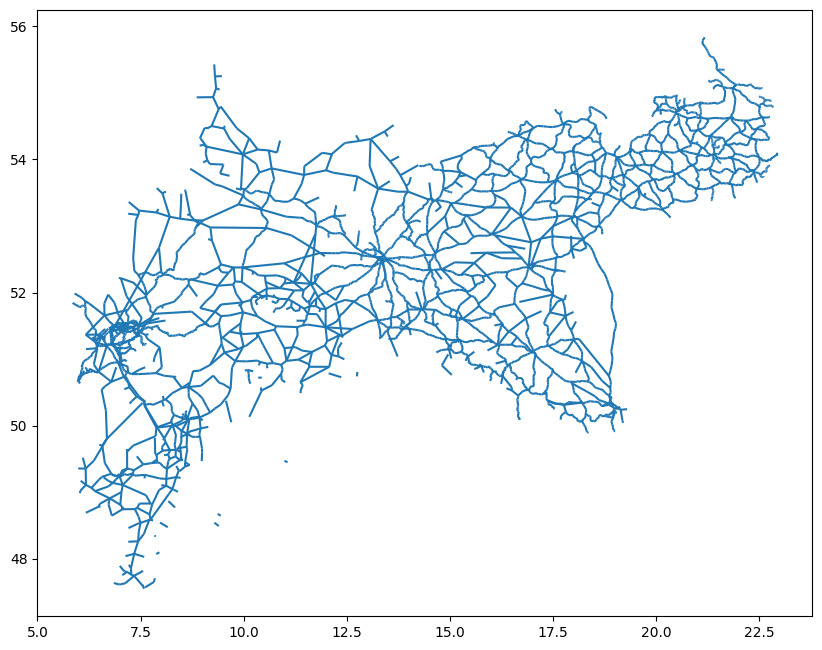

In [ ]:
gdfRails.plot(figsize=(10, 10))
plt.show()

In [ ]:
city_names = [
    'Memel', 'Königsberg', 'Danzig', 'Stettin', 'Stralsund',
    'Thorn', 'Frankfurt/Oder', 'Berlin', 'Magdeburg', 'Köln',
    'Schweidnitz', 'Halberstadt', 'Münster', 'Aachen'
]

city_coordinates = [
    (21.1443, 55.7033),     # Memel
    (10.566448, 50.080869), # Königsberg
    (18.6466, 54.3520),     # Danzig
    (14.5528, 53.4285),     # Stettin
    (13.0770, 54.3091),     # Stralsund
    (5.8427, 51.1626),      # Thorn
    (14.5506, 52.3472),     # Frankfurt/Oder
    (13.4050, 52.5200),     # Berlin
    (11.616667, 52.133331), # Magdeburg
    (6.953101, 50.935173),  # Köln
    (16.4757, 50.8498),     # Schweidnitz
    (11.0489, 51.8916),     # Halberstadt
    (7.6261, 51.9607),      # Münster
    (6.083611, 50.775555)   # Aachen
]

geometry = [Point(xy) for xy in city_coordinates]
data = {'City': city_names, 'Geometry': geometry}
gdfPlaces = gpd.GeoDataFrame(data, geometry='Geometry')
gdfPlaces.head(14)

,City,Geometry
0,Memel,POINT (21.14430 55.70330)
1,Königsberg,POINT (10.56645 50.08087)
2,Danzig,POINT (18.64660 54.35200)
3,Stettin,POINT (14.55280 53.42850)
4,Stralsund,POINT (13.07700 54.30910)
5,Thorn,POINT (5.84270 51.16260)
6,Frankfurt/Oder,POINT (14.55060 52.34720)
7,Berlin,POINT (13.40500 52.52000)
8,Magdeburg,POINT (11.61667 52.13333)
9,Köln,POINT (6.95310 50.93517)


# Distance Calculation:

In [ ]:
#Network params
projectCRS = "EPSG:4326"  # Example CRS: WGS 84
NetworkCRS = projectCRS #Calculate feature length in meters.
train_speed = 60 #km/h
walking_speed = 5 #km/h

gdfRails['opening'] = gdfRails['opening'].fillna(0)
gdfStations['opening'] = gdfStations['opening'].fillna(0)
gdfRails['closing'] = gdfRails['closing'].fillna(9999)
gdfStations['closing'] = gdfStations['closing'].fillna(9999)

#Assign unique IDs to stations
gdfStations.set_index(np.arange(100000, 100000+len(gdfStations), 1), inplace=True)
gdfStations['coordX'] = gdfStations.geometry.x
gdfStations['coordY'] = gdfStations.geometry.y

In [ ]:
#Infer orign and destination IDs for railway lines
def get_station_ids(geom):
    coordsO = geom.coords[0]
    coordsD = geom.coords[-1]
    idxO_candidates = gdfStations.index[(gdfStations['coordX'] == coordsO[0]) & (gdfStations['coordY'] == coordsO[1])]
    idxD_candidates = gdfStations.index[(gdfStations['coordX'] == coordsD[0]) & (gdfStations['coordY'] == coordsD[1])]
    if len(idxO_candidates) > 0 and len(idxD_candidates) > 0:
        idxO = idxO_candidates[0]
        idxD = idxD_candidates[0]
        return (idxO, idxD)
    else:
        return (None, None)

gdfRails[['oID', 'dID']] = gdfRails.apply(lambda x: get_station_ids(x.geometry), result_type='expand', axis=1)

In [ ]:
#Get all unique combinations of city pairs - origin-destination matrix
odXcoords = list(gdfPlaces.geometry.x)
odYcoords = list(gdfPlaces.geometry.y)
odIndices = list(gdfPlaces.index)
odMatrix = [combi for combi in list(itertools.combinations(zip(odXcoords, odYcoords, odIndices), 2))]

In [ ]:
#You can always walk from city to city.
#TODO: For now assume straight line, later use terrain-based model.
geomsWalk = [LineString(coordinates=[(od[0][0], od[0][1]), (od[1][0], od[1][1])]) for od in odMatrix]
oIdsWalk = [od[0][2] for od in odMatrix]
dIdsWalk = [od[1][2] for od in odMatrix]
gdfWalkCities = gpd.GeoDataFrame(geometry=geomsWalk, data=zip(oIdsWalk, dIdsWalk), crs=NetworkCRS, columns=['oID', 'dID'])

#You can always walk from city to station.
#TODO: For now assume straight line, later use model.
geomsWalkCitiesToStations = [LineString(coordinates=[(city[0], city[1]), (station[0], station[1])]) for city in zip(odXcoords, odYcoords) for station in zip(gdfStations.geometry.x, gdfStations.geometry.y)]
dataWalkCitiesToStations = [np.array([cityId, station[0], station[1], station[2]]) for cityId in odIndices for station in zip(gdfStations.index, gdfStations.opening, gdfStations.closing)]
gdfWalkCitiesToStations = gpd.GeoDataFrame(data=dataWalkCitiesToStations, geometry=geomsWalkCitiesToStations, crs=gdfStations.crs, columns=['oID', 'dID', 'opening', 'closing'])

#If provided datasets have broken topology, fix invalid geometries
#gdfWalkCitiesToStations = gdfWalkCitiesToStations.loc[gdfWalkCitiesToStations.geometry.is_valid]

In [ ]:
# Convert degrees to kilometers function
def degrees_to_km(coord1, coord2):
    return great_circle(coord1, coord2).kilometers

# Convert lengths to kilometers for gdfRails
gdfRails['length_km'] = gdfRails.geometry.apply(lambda geom: degrees_to_km(geom.coords[0], geom.coords[1]))

# Convert lengths to kilometers for gdfWalkCities
gdfWalkCities['length_km'] = gdfWalkCities.geometry.apply(lambda geom: degrees_to_km(geom.coords[0], geom.coords[1]))

# Convert lengths to kilometers for gdfWalkCitiesToStations
gdfWalkCitiesToStations['length_km'] = gdfWalkCitiesToStations.geometry.apply(lambda geom: degrees_to_km(geom.coords[0], geom.coords[1]))

# Calculate time based on length and speed for each GeoDataFrame
gdfRails['time'] = gdfRails['length_km'] / train_speed
gdfWalkCities['time'] = gdfWalkCities['length_km'] / walking_speed
gdfWalkCitiesToStations['time'] = gdfWalkCitiesToStations['length_km'] / walking_speed

In [ ]:
#Correct dtype
gdfWalkCitiesToStations['opening'] = gdfWalkCitiesToStations['opening'].astype(float)
gdfWalkCitiesToStations['closing'] = gdfWalkCitiesToStations['closing'].astype(float)
gdfRails.loc[gdfRails['oID'].isna(), 'oID'] = np.arange(900000, 900000+len(gdfRails.loc[gdfRails['oID'].isna()]),1) #Import: Assign some IDs not used by other nodes of the network
gdfRails.loc[gdfRails['dID'].isna(), 'dID'] = np.arange(900000, 900000+len(gdfRails.loc[gdfRails['dID'].isna()]),1)
gdfRails['oID'] = gdfRails['oID'].astype(int)
gdfRails['dID'] = gdfRails['dID'].astype(int)
gdfWalkCities['oID'] = gdfWalkCities['oID'].astype(int)
gdfWalkCities['dID'] = gdfWalkCities['dID'].astype(int)
gdfWalkCitiesToStations['oID'] = gdfWalkCitiesToStations['oID'].astype(int)
gdfWalkCitiesToStations['dID'] = gdfWalkCitiesToStations['dID'].astype(int)

In [ ]:
# Create a list of years from 1821 to 1865
years = list(range(1821, 1866))

# Create an empty DataFrame to store the results
result_df = pd.DataFrame(columns=['Year'] + [f"{city1} - {city2}" for city1 in gdfPlaces['City'] for city2 in gdfPlaces['City'] if city1 != city2])

# Iterate through each year
for year in years:
    # Filter the networks based on the year
    gdfNetwork = pd.concat([
        gdfRails[(gdfRails['opening'] <= year) & (gdfRails['closing'] >= year)],
        gdfWalkCities,
        gdfWalkCitiesToStations[(gdfWalkCitiesToStations['opening'] <= year) & (gdfWalkCitiesToStations['closing'] >= year)]
    ])

    gdfNetwork = gdfNetwork[['oID', 'dID'] + [col for col in gdfNetwork.columns if col not in ['oID', 'dID']]]

    # Build the network graph
    N = igraph.Graph.DataFrame(gdfNetwork, directed=False)

    # Calculate pairwise distances
    times = N.distances(source=gdfPlaces.index.to_list(), target=gdfPlaces.index.to_list(), weights='time', mode='out')

    # Create a dictionary to store data for the current year
    year_data = {'Year': year}

    # Iterate through each city pair
    for origin_idx, origin in enumerate(gdfPlaces.index):
        for dest_idx, destination in enumerate(gdfPlaces.index):
            if origin_idx != dest_idx:
                distance = times[origin_idx][dest_idx]
                year_data[f"{gdfPlaces['City'][origin]} - {gdfPlaces['City'][destination]}"] = distance

    # Append the year's data to the result DataFrame
    result_df = result_df.append(year_data, ignore_index=True)

result_df = result_df.apply(pd.to_numeric, errors='coerce')

<ipython-input-13-c03b2266c0f2>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(year_data, ignore_index=True)
<ipython-input-13-c03b2266c0f2>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(year_data, ignore_index=True)
<ipython-input-13-c03b2266c0f2>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(year_data, ignore_index=True)
<ipython-input-13-c03b2266c0f2>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(year_data, ignore_index=True)
<ipython-input-13-c03b2266c0f2>:35: FutureWarning: The frame.append method is de

In [ ]:
result_df.head()

,Year,Memel - Königsberg,Memel - Danzig,Memel - Stettin,Memel - Stralsund,Memel - Thorn,Memel - Frankfurt/Oder,Memel - Berlin,Memel - Magdeburg,Memel - Köln,...,Aachen - Stettin,Aachen - Stralsund,Aachen - Thorn,Aachen - Frankfurt/Oder,Aachen - Berlin,Aachen - Magdeburg,Aachen - Köln,Aachen - Schweidnitz,Aachen - Halberstadt,Aachen - Münster
0,1821.0,264.109269,62.319608,154.284316,181.834506,354.080941,162.918431,184.889368,225.12266,331.842045,...,197.070565,173.736559,10.09918,191.405407,167.243123,126.612339,19.655591,231.115496,113.115958,43.144519
1,1822.0,264.109269,62.319608,154.284316,181.834506,354.080941,162.918431,184.889368,225.12266,331.842045,...,197.070565,173.736559,10.09918,191.405407,167.243123,126.612339,19.655591,231.115496,113.115958,43.144519
2,1823.0,264.109269,62.319608,154.284316,181.834506,354.080941,162.918431,184.889368,225.12266,331.842045,...,197.070565,173.736559,10.09918,191.405407,167.243123,126.612339,19.655591,231.115496,113.115958,43.144519
3,1824.0,264.109269,62.319608,154.284316,181.834506,354.080941,162.918431,184.889368,225.12266,331.842045,...,197.070565,173.736559,10.09918,191.405407,167.243123,126.612339,19.655591,231.115496,113.115958,43.144519
4,1825.0,264.109269,62.319608,154.284316,181.834506,354.080941,162.918431,184.889368,225.12266,331.842045,...,197.070565,173.736559,10.09918,191.405407,167.243123,126.612339,19.655591,231.115496,113.115958,43.144519


# Price data:

In [ ]:
upload = files.upload()
ryhe = pd.read_csv('ryhe.csv', sep=';')

Saving ryhe.csv to ryhe.csv


In [ ]:
ryhe.head()

,Year,Memel,Königsberg,Danzig,Stettin,Stralsund,Thorn,Frankfurt/Oder,Berlin,Magdeburg,Köln,Schweidnitz,Halberstadt,Münster,Aachen
0,1821,"63,3","65,7",65,"54,7","57,8","58,3","58,5","66,1","66,1","70,1","80,3","71,2","96,6","83,3"
1,1822,"85,5","76,6","74,7","77,4","60,8","76,6","98,9","99,8","92,5","135,3","131,5","91,9",NaN,"137,9"
2,1823,"71,5","52,1","53,6",63,"57,4","53,6","59,8","71,3",74,"69,8","85,5","86,2","86,2","82,5"
3,1828,"78,1","97,7","89,4","117,7","101,3","91,3","109,8","129,8","139,6","143,8","104,2","138,1","113,4","152,5"
4,1831,"85,2","103,6","108,9",151,"119,2","140,1",166,"163,6","139,2","178,6","100,2","147,4","194,8","196,3"


In [ ]:
if "Stadt" in ryhe.iloc[0]:
    # Replace "Stadt" with "Year" in both column label and first row
    ryhe.columns = ryhe.columns.str.replace("Stadt", "Year")

In [ ]:
ryhe = ryhe.astype(str)

# Replace commas with dots within the DataFrame
ryhe = ryhe.applymap(lambda x: x.replace(',', '.'))

# Convert columns to numeric types
ryhe = ryhe.apply(pd.to_numeric, errors='coerce')

In [ ]:
ryhe.head()

,Year,Memel,Königsberg,Danzig,Stettin,Stralsund,Thorn,Frankfurt/Oder,Berlin,Magdeburg,Köln,Schweidnitz,Halberstadt,Münster,Aachen
0,1821,63.3,65.7,65.0,54.7,57.8,58.3,58.5,66.1,66.1,70.1,80.3,71.2,96.6,83.3
1,1822,85.5,76.6,74.7,77.4,60.8,76.6,98.9,99.8,92.5,135.3,131.5,91.9,NaN,137.9
2,1823,71.5,52.1,53.6,63.0,57.4,53.6,59.8,71.3,74.0,69.8,85.5,86.2,86.2,82.5
3,1828,78.1,97.7,89.4,117.7,101.3,91.3,109.8,129.8,139.6,143.8,104.2,138.1,113.4,152.5
4,1831,85.2,103.6,108.9,151.0,119.2,140.1,166.0,163.6,139.2,178.6,100.2,147.4,194.8,196.3


In [ ]:
# Define the list of cities from gdfPlaces
cities = ['Memel', 'Königsberg', 'Danzig', 'Stettin', 'Stralsund',
          'Thorn', 'Frankfurt/Oder', 'Berlin', 'Magdeburg', 'Köln',
          'Schweidnitz', 'Halberstadt', 'Münster', 'Aachen']

# Create a new DataFrame for pairwise city comparisons
pairwise_df = pd.DataFrame(columns=['Year'] + [f"{city1} - {city2}" for city1 in cities for city2 in cities if city1 != city2])

# Iterate through each row in 'ryhe' DataFrame
for index, row in ryhe.iterrows():
    year = row['Year']
    pairwise_row = [year]
    for city1 in cities:
        for city2 in cities:
            if city1 != city2:
                price1 = row[city1]
                price2 = row[city2]
                value = np.abs(np.log(price1 / price2))
                pairwise_row.append(value)
    pairwise_df.loc[index] = pairwise_row

# Now you can work with the 'pairwise_df' DataFrame
pairwise_df

,Year,Memel - Königsberg,Memel - Danzig,Memel - Stettin,Memel - Stralsund,Memel - Thorn,Memel - Frankfurt/Oder,Memel - Berlin,Memel - Magdeburg,Memel - Köln,...,Aachen - Stettin,Aachen - Stralsund,Aachen - Thorn,Aachen - Frankfurt/Oder,Aachen - Berlin,Aachen - Magdeburg,Aachen - Köln,Aachen - Schweidnitz,Aachen - Halberstadt,Aachen - Münster
0,1821.0,0.037214,0.026502,0.146022,0.090897,0.082283,0.078859,0.043283,0.043283,0.102037,...,0.420585,0.365460,0.356846,0.353422,0.231280,0.231280,0.172526,0.036679,0.156956,0.148130
1,1822.0,0.109919,0.135036,0.099530,0.340927,0.109919,0.145593,0.154652,0.078692,0.458978,...,0.577542,0.818939,0.587932,0.332420,0.323361,0.399320,0.019034,0.047522,0.405828,NaN
2,1823.0,0.316533,0.288148,0.126563,0.219653,0.288148,0.178692,0.002801,0.034368,0.024063,...,0.269664,0.362754,0.431249,0.321793,0.145902,0.108733,0.167164,0.035718,0.043872,0.043872
3,1828.0,0.223912,0.135131,0.410149,0.260096,0.156161,0.340670,0.508005,0.580791,0.610433,...,0.259026,0.409078,0.513014,0.328504,0.161170,0.088383,0.058741,0.380852,0.099187,0.296243
4,1831.0,0.195536,0.245429,0.572278,0.335801,0.497355,0.666986,0.652423,0.490910,0.740147,...,0.262364,0.498841,0.337288,0.167656,0.182220,0.343732,0.094495,0.672476,0.286494,0.007671
5,1832.0,0.102326,0.074589,0.059898,0.062010,0.075630,0.064913,0.172736,0.285154,0.234082,...,0.234495,0.232383,0.218764,0.359306,0.121658,0.009240,0.060311,0.218764,0.064762,0.164607
6,1833.0,0.194768,0.187855,0.232464,0.381028,0.271636,0.248193,0.111617,0.148458,0.139667,...,0.188704,0.337268,0.227876,0.204433,0.067857,0.104698,0.095907,0.249328,0.168501,0.032326
7,1834.0,0.164590,0.177709,0.004028,0.209419,0.274701,0.041031,0.058553,0.068634,0.097020,...,0.064606,0.140785,0.206067,0.027603,0.127187,0.000000,0.028386,0.016017,0.009641,0.047303
8,1835.0,0.092412,0.141335,0.100026,0.031944,0.289699,0.156774,0.083478,0.043243,0.066652,...,0.065632,0.197602,0.455357,0.322432,0.082180,0.208901,0.099006,0.471644,0.168079,0.113821
9,1836.0,0.110991,0.102115,0.055606,0.097484,0.493686,0.108024,0.133033,0.245238,0.221014,...,0.209210,0.167332,0.758502,0.372840,0.131784,0.019578,0.043803,0.522802,0.010257,0.169748


In [ ]:
# Get the years that exist in pairwise_df
common_years = pairwise_df['Year']

# Filter result_df to keep only rows with years that exist in pairwise_df
result_df_filtered = result_df[result_df['Year'].isin(common_years)]

result_df_filtered.head()

,Year,Memel - Königsberg,Memel - Danzig,Memel - Stettin,Memel - Stralsund,Memel - Thorn,Memel - Frankfurt/Oder,Memel - Berlin,Memel - Magdeburg,Memel - Köln,...,Aachen - Stettin,Aachen - Stralsund,Aachen - Thorn,Aachen - Frankfurt/Oder,Aachen - Berlin,Aachen - Magdeburg,Aachen - Köln,Aachen - Schweidnitz,Aachen - Halberstadt,Aachen - Münster
0,1821.0,264.109269,62.319608,154.284316,181.834506,354.080941,162.918431,184.889368,225.12266,331.842045,...,197.070565,173.736559,10.09918,191.405407,167.243123,126.612339,19.655591,231.115496,113.115958,43.144519
1,1822.0,264.109269,62.319608,154.284316,181.834506,354.080941,162.918431,184.889368,225.12266,331.842045,...,197.070565,173.736559,10.09918,191.405407,167.243123,126.612339,19.655591,231.115496,113.115958,43.144519
2,1823.0,264.109269,62.319608,154.284316,181.834506,354.080941,162.918431,184.889368,225.12266,331.842045,...,197.070565,173.736559,10.09918,191.405407,167.243123,126.612339,19.655591,231.115496,113.115958,43.144519
7,1828.0,264.109269,62.319608,154.284316,181.834506,354.080941,162.918431,184.889368,225.12266,331.842045,...,197.070565,173.736559,10.09918,191.405407,167.243123,126.612339,19.655591,231.115496,113.115958,43.144519
10,1831.0,264.109269,62.319608,154.284316,181.834506,354.080941,162.918431,184.889368,225.12266,331.842045,...,197.070565,173.736559,10.09918,191.405407,167.243123,126.612339,19.655591,231.115496,113.115958,43.144519


In [ ]:
# Get the columns that are not 'Year'
value_columns = [col for col in result_df_filtered.columns if col != 'Year']

# Apply np.log to all values in the value columns
result_df_filtered[value_columns] = result_df_filtered[value_columns].apply(np.log)

# Now you can work with the result_df_filtered DataFrame with np.log applied
result_df_filtered.head()

<ipython-input-56-35090365b520>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df_filtered[value_columns] = result_df_filtered[value_columns].apply(np.log)


,Year,Memel - Königsberg,Memel - Danzig,Memel - Stettin,Memel - Stralsund,Memel - Thorn,Memel - Frankfurt/Oder,Memel - Berlin,Memel - Magdeburg,Memel - Köln,...,Aachen - Stettin,Aachen - Stralsund,Aachen - Thorn,Aachen - Frankfurt/Oder,Aachen - Berlin,Aachen - Magdeburg,Aachen - Köln,Aachen - Schweidnitz,Aachen - Halberstadt,Aachen - Münster
0,1821.0,5.576363,4.132276,5.038797,5.203097,5.869526,5.09325,5.219758,5.416645,5.804659,...,5.283562,5.15754,2.312454,5.254394,5.119449,4.84113,2.978362,5.442918,4.728413,3.764555
1,1822.0,5.576363,4.132276,5.038797,5.203097,5.869526,5.09325,5.219758,5.416645,5.804659,...,5.283562,5.15754,2.312454,5.254394,5.119449,4.84113,2.978362,5.442918,4.728413,3.764555
2,1823.0,5.576363,4.132276,5.038797,5.203097,5.869526,5.09325,5.219758,5.416645,5.804659,...,5.283562,5.15754,2.312454,5.254394,5.119449,4.84113,2.978362,5.442918,4.728413,3.764555
7,1828.0,5.576363,4.132276,5.038797,5.203097,5.869526,5.09325,5.219758,5.416645,5.804659,...,5.283562,5.15754,2.312454,5.254394,5.119449,4.84113,2.978362,5.442918,4.728413,3.764555
10,1831.0,5.576363,4.132276,5.038797,5.203097,5.869526,5.09325,5.219758,5.416645,5.804659,...,5.283562,5.15754,2.312454,5.254394,5.119449,4.84113,2.978362,5.442918,4.728413,3.764555


In [ ]:
y_df = pairwise_df
x_df = result_df_filtered

In [ ]:
x_df

,Year,Memel - Königsberg,Memel - Danzig,Memel - Stettin,Memel - Stralsund,Memel - Thorn,Memel - Frankfurt/Oder,Memel - Berlin,Memel - Magdeburg,Memel - Köln,...,Aachen - Stettin,Aachen - Stralsund,Aachen - Thorn,Aachen - Frankfurt/Oder,Aachen - Berlin,Aachen - Magdeburg,Aachen - Köln,Aachen - Schweidnitz,Aachen - Halberstadt,Aachen - Münster
0,1821.0,5.576363,4.132276,5.038797,5.203097,5.869526,5.093250,5.219758,5.416645,5.804659,...,5.283562,5.157540,2.312454,5.254394,5.119449,4.841130,2.978362,5.442918,4.728413,3.764555
1,1822.0,5.576363,4.132276,5.038797,5.203097,5.869526,5.093250,5.219758,5.416645,5.804659,...,5.283562,5.157540,2.312454,5.254394,5.119449,4.841130,2.978362,5.442918,4.728413,3.764555
2,1823.0,5.576363,4.132276,5.038797,5.203097,5.869526,5.093250,5.219758,5.416645,5.804659,...,5.283562,5.157540,2.312454,5.254394,5.119449,4.841130,2.978362,5.442918,4.728413,3.764555
7,1828.0,5.576363,4.132276,5.038797,5.203097,5.869526,5.093250,5.219758,5.416645,5.804659,...,5.283562,5.157540,2.312454,5.254394,5.119449,4.841130,2.978362,5.442918,4.728413,3.764555
10,1831.0,5.576363,4.132276,5.038797,5.203097,5.869526,5.093250,5.219758,5.416645,5.804659,...,5.283562,5.157540,2.312454,5.254394,5.119449,4.841130,2.978362,5.442918,4.728413,3.764555
11,1832.0,5.576363,4.132276,5.038797,5.203097,5.869526,5.093250,5.219758,5.416645,5.804659,...,5.283562,5.157540,2.312454,5.254394,5.119449,4.841130,2.978362,5.442918,4.728413,3.764555
12,1833.0,5.576363,4.132276,5.038797,5.203097,5.869526,5.093250,5.219758,5.416645,5.804659,...,5.283562,5.157540,2.312454,5.254394,5.119449,4.841130,2.978362,5.442918,4.728413,3.764555
13,1834.0,5.576363,4.132276,5.038797,5.203097,5.869526,5.093250,5.219758,5.416645,5.804659,...,5.283562,5.157540,2.312454,5.254394,5.119449,4.841130,2.978362,5.442918,4.728413,3.764555
14,1835.0,5.576363,4.132276,5.038797,5.203097,5.869526,5.093250,5.219758,5.416645,5.804659,...,5.283562,5.157540,2.312454,5.254394,5.119449,4.841130,2.978362,5.442918,4.728413,3.764555
15,1836.0,5.576363,4.132276,5.038797,5.203097,5.869526,5.093250,5.219758,5.416645,5.804659,...,5.283562,5.157540,2.312454,5.254394,5.119449,4.841130,2.978362,5.442918,4.728413,3.764555


In [ ]:
y_df.set_index('Year', inplace=True)
x_df.set_index('Year', inplace=True)

# Model 1

In [ ]:
# Calculate the average of all row values for each year in y_df
y_time_avg = y_df.groupby('Year').mean()

# Create y_time_avg_df from the calculated averages
y_time_avg_df = pd.DataFrame({'y_avg': y_time_avg.mean(axis=1)})

# Now you can use the y_time_avg_df DataFrame
y_time_avg_df.head(31)

,y_avg
Year,
1821.0,0.178426
1822.0,0.292513
1823.0,0.219562
1828.0,0.239660
1831.0,0.306523
1832.0,0.157959
1833.0,0.121695
1834.0,0.104830
1835.0,0.163924


In [ ]:
y_time_avg_df

,y_avg
Year,
1821.0,0.178426
1822.0,0.292513
1823.0,0.219562
1828.0,0.239660
1831.0,0.306523
1832.0,0.157959
1833.0,0.121695
1834.0,0.104830
1835.0,0.163924


In [ ]:
y_indv_avg = y_df.mean()

# Create y_indv_avg_df with column names and averages
y_indv_avg_df = pd.DataFrame({'Average': y_indv_avg.values}, index=y_df.columns)

# Transpose the DataFrame to match your desired structure
y_indv_avg_df = y_indv_avg_df.T

#y_indv_avg_df = y_indv_avg_df.drop("Year", axis=1)

# Now you can use the y_indv_avg_df DataFrame
y_indv_avg_df.head()

,Memel - Königsberg,Memel - Danzig,Memel - Stettin,Memel - Stralsund,Memel - Thorn,Memel - Frankfurt/Oder,Memel - Berlin,Memel - Magdeburg,Memel - Köln,Memel - Schweidnitz,...,Aachen - Stettin,Aachen - Stralsund,Aachen - Thorn,Aachen - Frankfurt/Oder,Aachen - Berlin,Aachen - Magdeburg,Aachen - Köln,Aachen - Schweidnitz,Aachen - Halberstadt,Aachen - Münster
Average,0.094429,0.09739,0.140051,0.119599,0.145751,0.142261,0.177067,0.210398,0.277625,0.159418,...,0.237331,0.313629,0.395805,0.275741,0.16498,0.144922,0.059497,0.282503,0.130978,0.115178


In [ ]:
y_indv_avg_df

,Memel - Königsberg,Memel - Danzig,Memel - Stettin,Memel - Stralsund,Memel - Thorn,Memel - Frankfurt/Oder,Memel - Berlin,Memel - Magdeburg,Memel - Köln,Memel - Schweidnitz,...,Aachen - Stettin,Aachen - Stralsund,Aachen - Thorn,Aachen - Frankfurt/Oder,Aachen - Berlin,Aachen - Magdeburg,Aachen - Köln,Aachen - Schweidnitz,Aachen - Halberstadt,Aachen - Münster
Average,0.094429,0.09739,0.140051,0.119599,0.145751,0.142261,0.177067,0.210398,0.277625,0.159418,...,0.237331,0.313629,0.395805,0.275741,0.16498,0.144922,0.059497,0.282503,0.130978,0.115178


In [ ]:
# Calculate the average of all row values for each year in y_df
x_time_avg = x_df.groupby('Year').mean()

# Create y_time_avg_df from the calculated averages
x_time_avg_df = pd.DataFrame({'y_avg': x_time_avg.mean(axis=1)})

x_indv_avg = x_df.mean()

# Create y_indv_avg_df with column names and averages
x_indv_avg_df = pd.DataFrame({'Average': x_indv_avg.values}, index=x_df.columns)

# Transpose the DataFrame to match your desired structure
x_indv_avg_df = x_indv_avg_df.T

In [ ]:
# Calculate the average value of y_df
average_value_y = y_df.mean().mean()

# Create new_y_df with the same structure as y_df
new_y_df = y_df.copy()

# Subtract the average value of y_df and corresponding values from y_time_avg_df and y_indv_avg_df
for i, city in enumerate(y_df.columns):
    for j, year in enumerate(y_df.index):
        y_indv_avg_value = y_indv_avg_df.loc['Average', city]
        y_time_avg_value = y_time_avg_df.loc[year, 'y_avg']

        new_value = y_df.iloc[j, i] - average_value_y - y_indv_avg_value - y_time_avg_value
        new_y_df.iloc[j, i] = new_value

# Now you can use the new_y_df DataFrame
new_y_df

,Memel - Königsberg,Memel - Danzig,Memel - Stettin,Memel - Stralsund,Memel - Thorn,Memel - Frankfurt/Oder,Memel - Berlin,Memel - Magdeburg,Memel - Köln,Memel - Schweidnitz,...,Aachen - Stettin,Aachen - Stralsund,Aachen - Thorn,Aachen - Frankfurt/Oder,Aachen - Berlin,Aachen - Magdeburg,Aachen - Köln,Aachen - Schweidnitz,Aachen - Halberstadt,Aachen - Münster
Year,,,,,,,,,,,,,,,,,,,,,
1821.0,-0.415555,-0.429228,-0.352369,-0.387043,-0.421808,-0.421743,-0.492124,-0.525455,-0.533928,-0.279874,...,-0.175086,-0.306509,-0.397299,-0.280659,-0.292041,-0.271983,-0.245312,-0.604164,-0.332363,-0.325388
1822.0,-0.456937,-0.434781,-0.512948,-0.251100,-0.508259,-0.469095,-0.494843,-0.604133,-0.291074,-0.201355,...,-0.132216,0.032883,-0.280301,-0.415749,-0.314047,-0.218030,-0.512890,-0.707408,-0.197578,NaN
1823.0,-0.177373,-0.208718,-0.412964,-0.299422,-0.257079,-0.363046,-0.573743,-0.575507,-0.653038,-0.380076,...,-0.367144,-0.350351,-0.364033,-0.353425,-0.418555,-0.435666,-0.291810,-0.646261,-0.486583,-0.470783
1828.0,-0.290092,-0.381834,-0.149477,-0.279078,-0.409165,-0.221165,-0.088638,-0.049182,-0.086766,-0.290671,...,-0.397880,-0.324125,-0.302366,-0.366812,-0.423386,-0.476114,-0.420331,-0.321226,-0.451367,-0.238510
1831.0,-0.385331,-0.338399,-0.054210,-0.270236,-0.134834,0.038287,-0.011082,-0.205925,-0.023916,-0.483689,...,-0.461405,-0.301225,-0.544956,-0.594522,-0.469199,-0.287628,-0.451440,-0.096465,-0.330922,-0.593946
1832.0,-0.329976,-0.360674,-0.418026,-0.395462,-0.407994,-0.415222,-0.342205,-0.263117,-0.381416,-0.421661,...,-0.340709,-0.419118,-0.514915,-0.254308,-0.381196,-0.473556,-0.337060,-0.401613,-0.404090,-0.288445
1833.0,-0.201271,-0.211144,-0.209197,-0.040181,-0.175724,-0.195678,-0.367060,-0.363550,-0.439568,-0.167940,...,-0.350237,-0.277971,-0.469539,-0.372918,-0.398733,-0.341834,-0.265200,-0.334784,-0.264087,-0.384462
1834.0,-0.214583,-0.204425,-0.420767,-0.194924,-0.155794,-0.385974,-0.403258,-0.426508,-0.465349,-0.391546,...,-0.457469,-0.457588,-0.474482,-0.532882,-0.322537,-0.429667,-0.315855,-0.551230,-0.406081,-0.352620
1835.0,-0.345855,-0.299893,-0.383863,-0.431493,-0.199889,-0.329325,-0.437427,-0.510993,-0.554811,-0.197270,...,-0.515537,-0.459865,-0.284286,-0.297147,-0.426639,-0.279859,-0.304330,-0.154697,-0.306737,-0.345196


In [ ]:
# Calculate the average value of y_df
average_value_x = x_df.mean().mean()

# Create new_y_df with the same structure as y_df
new_x_df = x_df.copy()

# Subtract the average value of y_df and corresponding values from y_time_avg_df and y_indv_avg_df
for i, city in enumerate(x_df.columns):
    for j, year in enumerate(x_df.index):
        x_indv_avg_value = x_indv_avg_df.loc['Average', city]
        x_time_avg_value = x_time_avg_df.loc[year, 'y_avg']

        new_value_x = x_df.iloc[j, i] - average_value_x - x_indv_avg_value - x_time_avg_value
        new_x_df.iloc[j, i] = new_value_x

# Now you can use the new_y_df DataFrame
new_x_df

,Memel - Königsberg,Memel - Danzig,Memel - Stettin,Memel - Stralsund,Memel - Thorn,Memel - Frankfurt/Oder,Memel - Berlin,Memel - Magdeburg,Memel - Köln,Memel - Schweidnitz,...,Aachen - Stettin,Aachen - Stralsund,Aachen - Thorn,Aachen - Frankfurt/Oder,Aachen - Berlin,Aachen - Magdeburg,Aachen - Köln,Aachen - Schweidnitz,Aachen - Halberstadt,Aachen - Münster
Year,,,,,,,,,,,,,,,,,,,,,
1821.0,-7.994431,-8.201295,-7.988765,-8.082414,-7.783752,-7.983626,-7.912626,-7.838624,-7.753439,-8.008550,...,-7.352727,-7.750519,-8.409609,-7.370891,-7.365916,-7.458402,-7.010390,-7.366006,-7.454248,-7.271205
1822.0,-7.995885,-8.202749,-7.990219,-8.083868,-7.785206,-7.985080,-7.914079,-7.840078,-7.754893,-8.010004,...,-7.354180,-7.751973,-8.411063,-7.372345,-7.367370,-7.459855,-7.011843,-7.367460,-7.455701,NaN
1823.0,-7.994431,-8.201295,-7.988765,-8.082414,-7.783752,-7.983626,-7.912626,-7.838624,-7.753439,-8.008550,...,-7.352727,-7.750519,-8.409609,-7.370891,-7.365916,-7.458402,-7.010390,-7.366006,-7.454248,-7.271205
1828.0,-7.994431,-8.201295,-7.988765,-8.082414,-7.783752,-7.983626,-7.912626,-7.838624,-7.753439,-8.008550,...,-7.352727,-7.750519,-8.409609,-7.370891,-7.365916,-7.458402,-7.010390,-7.366006,-7.454248,-7.271205
1831.0,-7.994431,-8.201295,-7.988765,-8.082414,-7.783752,-7.983626,-7.912626,-7.838624,-7.753439,-8.008550,...,-7.352727,-7.750519,-8.409609,-7.370891,-7.365916,-7.458402,-7.010390,-7.366006,-7.454248,-7.271205
1832.0,-7.994431,-8.201295,-7.988765,-8.082414,-7.783752,-7.983626,-7.912626,-7.838624,-7.753439,-8.008550,...,-7.352727,-7.750519,-8.409609,-7.370891,-7.365916,-7.458402,-7.010390,-7.366006,-7.454248,-7.271205
1833.0,-7.994431,-8.201295,-7.988765,-8.082414,-7.783752,-7.983626,-7.912626,-7.838624,-7.753439,-8.008550,...,-7.352727,-7.750519,-8.409609,-7.370891,-7.365916,-7.458402,-7.010390,-7.366006,-7.454248,-7.271205
1834.0,-7.994431,-8.201295,-7.988765,-8.082414,-7.783752,-7.983626,-7.912626,-7.838624,-7.753439,-8.008550,...,-7.352727,-7.750519,-8.409609,-7.370891,-7.365916,-7.458402,-7.010390,-7.366006,-7.454248,-7.271205
1835.0,-7.994431,-8.201295,-7.988765,-8.082414,-7.783752,-7.983626,-7.912626,-7.838624,-7.753439,-8.008550,...,-7.352727,-7.750519,-8.409609,-7.370891,-7.365916,-7.458402,-7.010390,-7.366006,-7.454248,-7.271205


In [ ]:
missing_indices = new_x_df[new_x_df.isna().any(axis=1)].index

# Fill corresponding cells in new_y_df with NaN values
new_y_df.loc[missing_indices, new_x_df.columns] = np.nan

In [ ]:
for index, row in new_x_df.iterrows():
    for column in new_x_df.columns:
        if pd.isna(row[column]):
            new_y_df.loc[index, column] = np.nan

In [ ]:
for index, row in new_y_df.iterrows():
    for column in new_y_df.columns:
        if pd.isna(row[column]):
            new_x_df.loc[index, column] = np.nan

In [ ]:
# Put all values from new_y_df into a single vector
y_values = new_y_df.values.flatten()

# Drop NaN values from the vector
y_values_cleaned = y_values[~np.isnan(y_values)]
y_values_cleaned

array([-0.41555543, -0.42922826, -0.35236914, ..., -0.49547178,
       -0.28072956, -0.28950941])

In [ ]:
# Put all values from new_y_df into a single vector
x_values = new_x_df.values.flatten()

# Drop NaN values from the vector
x_values_cleaned = x_values[~np.isnan(x_values)]
x_values_cleaned

array([-7.99443143, -8.20129534, -7.98876535, ..., -7.93702088,
       -7.91652109, -8.02720015])

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming you have created x_values_cleaned and y_values_cleaned vectors

# Add a constant term to the x_values_cleaned for the intercept
x_values_cleaned_with_const = sm.add_constant(x_values_cleaned)

# Perform OLS regression
model = sm.OLS(y_values_cleaned, x_values_cleaned_with_const)
results = model.fit()

# Get the regression summary
summary = results.summary()

# Print the summary
print(summary)

# Check the p-value for the coefficient 'a'
p_value_a = results.pvalues[1]  # Coefficient for x_values_cleaned

# Check if the p-value is significant at the 5% level
if p_value_a <= 0.05:
    print("Coefficient 'a' is significant at the 5% level.")
else:
    print("Coefficient 'a' is not significant at the 5% level.")


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.540
Date:                Mon, 14 Aug 2023   Prob (F-statistic):             0.0600
Time:                        10:24:06   Log-Likelihood:                 4077.5
No. Observations:                4732   AIC:                            -8151.
Df Residuals:                    4730   BIC:                            -8138.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4132      0.028    -14.540      0.0

# Model 2

In [ ]:
for index, row in x_df.iterrows():
    for column in x_df.columns:
        if pd.isna(row[column]):
            y_df.loc[index, column] = np.nan

In [ ]:
for index, row in y_df.iterrows():
    for column in y_df.columns:
        if pd.isna(row[column]):
            x_df.loc[index, column] = np.nan

In [ ]:
# Put all values from y_df into a single vector
y_values = y_df.values.flatten()

# Drop NaN values from the vector
y_values_cleaned = y_values[~np.isnan(y_values)]

In [ ]:
# Put all values from y_df into a single vector
x_values = x_df.values.flatten()

# Drop NaN values from the vector
x_values_cleaned = x_values[~np.isnan(x_values)]

In [ ]:
x_values_cleaned_with_const = sm.add_constant(x_values_cleaned)

# Perform OLS regression
model = sm.OLS(y_values_cleaned, x_values_cleaned_with_const)
results = model.fit()

# Get the regression summary
summary = results.summary()

# Print the summary
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     404.2
Date:                Mon, 14 Aug 2023   Prob (F-statistic):           8.11e-87
Time:                        10:07:28   Log-Likelihood:                 3054.8
No. Observations:                5512   AIC:                            -6106.
Df Residuals:                    5510   BIC:                            -6092.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0647      0.006     10.732      0.0

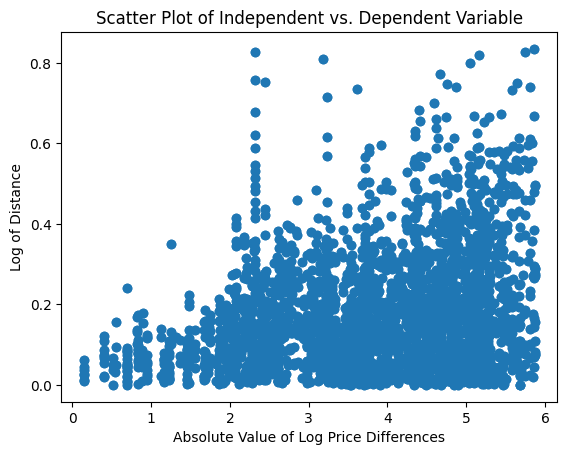

In [ ]:
plt.scatter(x_values_cleaned, y_values_cleaned)
plt.xlabel("Absolute Value of Log Price Differences")
plt.ylabel("Log of Distance")
plt.title("Scatter Plot of Independent vs. Dependent Variable")
plt.show()

# Model 3

In [ ]:
# Calculate the average value of y_df
average_value_y = y_df.mean().mean()

# Create new_y_df with the same structure as y_df
new_y_df = y_df.copy()

# Subtract the average value of y_df and corresponding values from y_time_avg_df and y_indv_avg_df
for i, city in enumerate(y_df.columns):
    for j, year in enumerate(y_df.index):
        y_indv_avg_value = y_indv_avg_df.loc['Average', city]
        y_time_avg_value = y_time_avg_df.loc[year, 'y_avg']

        new_value = y_df.iloc[j, i] - y_indv_avg_value
        new_y_df.iloc[j, i] = new_value

# Now you can use the new_y_df DataFrame
new_y_df

In [ ]:
# Calculate the average value of y_df
average_value_x = x_df.mean().mean()

# Create new_y_df with the same structure as y_df
new_x_df = x_df.copy()

# Subtract the average value of y_df and corresponding values from y_time_avg_df and y_indv_avg_df
for i, city in enumerate(x_df.columns):
    for j, year in enumerate(x_df.index):
        x_indv_avg_value = x_indv_avg_df.loc['Average', city]
        x_time_avg_value = x_time_avg_df.loc[year, 'y_avg']

        new_value_x = x_df.iloc[j, i] - x_indv_avg_value
        new_x_df.iloc[j, i] = new_value_x

# Now you can use the new_y_df DataFrame
new_x_df

In [ ]:
for index, row in new_x_df.iterrows():
    for column in new_x_df.columns:
        if pd.isna(row[column]):
            new_y_df.loc[index, column] = np.nan

In [ ]:
for index, row in new_y_df.iterrows():
    for column in new_y_df.columns:
        if pd.isna(row[column]):
            new_x_df.loc[index, column] = np.nan

In [ ]:
y_values = new_y_df.values.flatten()

# Drop NaN values from the vector
y_values_cleaned = y_values[~np.isnan(y_values)]

In [ ]:
x_values = new_x_df.values.flatten()

# Drop NaN values from the vector
x_values_cleaned = x_values[~np.isnan(y_values)]

In [ ]:
x_values_cleaned_with_const = sm.add_constant(x_values_cleaned)

# Perform OLS regression
model = sm.OLS(y_values_cleaned, x_values_cleaned_with_const)
results = model.fit()

# Get the regression summary
summary = results.summary()

# Print the summary
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     334.5
Date:                Mon, 14 Aug 2023   Prob (F-statistic):           1.34e-72
Time:                        10:35:21   Log-Likelihood:                 3981.7
No. Observations:                5512   AIC:                            -7959.
Df Residuals:                    5510   BIC:                            -7946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.735e-18      0.002    1.1e-15      1.0

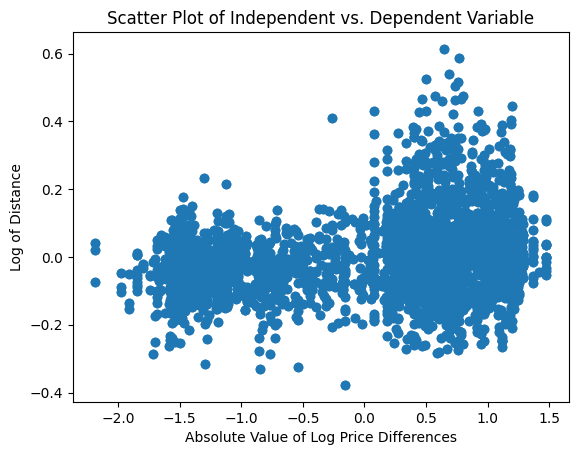

In [ ]:
plt.scatter(x_values_cleaned, y_values_cleaned)
plt.xlabel("Absolute Value of Log Price Differences")
plt.ylabel("Log of Distance")
plt.title("Scatter Plot of Independent vs. Dependent Variable")
plt.show()

In [ ]:
import pandas as pd
import igraph

# Create a list of years from 1821 to 1865
years = list(range(1821, 1866))

# Create an empty DataFrame to store the results
result_df = pd.DataFrame(columns=['Year'] + list(gdfPlaces['City']))

# Iterate through each year
for year in years:
    # Filter the networks based on the year
    gdfNetwork = pd.concat([
        gdfRails[(gdfRails['opening'] <= year) & (gdfRails['closing'] >= year)],
        gdfWalkCities,
        gdfWalkCitiesToStations[(gdfWalkCitiesToStations['opening'] <= year) & (gdfWalkCitiesToStations['closing'] >= year)]
    ])

    gdfNetwork = gdfNetwork[['oID', 'dID'] + [col for col in gdfNetwork.columns if col not in ['oID', 'dID']]]

    # Build the network graph
    N = igraph.Graph.DataFrame(gdfNetwork, directed=False)

    # Calculate pairwise distances
    times = N.distances(source=gdfPlaces.index.to_list(), target=gdfPlaces.index.to_list(), weights='time', mode='out')

    # Calculate average distances for each city
    year_data = {'Year': year}
    for origin_idx, origin in enumerate(gdfPlaces.index):
        distances_to_other_cities = [times[origin_idx][dest_idx] for dest_idx in range(len(gdfPlaces))]
        avg_distance = sum(distances_to_other_cities) / (len(gdfPlaces) - 1)  # Exclude self-distance
        year_data[gdfPlaces['City'][origin]] = avg_distance

    # Append the year's data to the result DataFrame
    result_df = result_df.append(year_data, ignore_index=True)

result_df = result_df.apply(pd.to_numeric, errors='coerce')

# Display the resulting DataFrame


In [ ]:
result_df

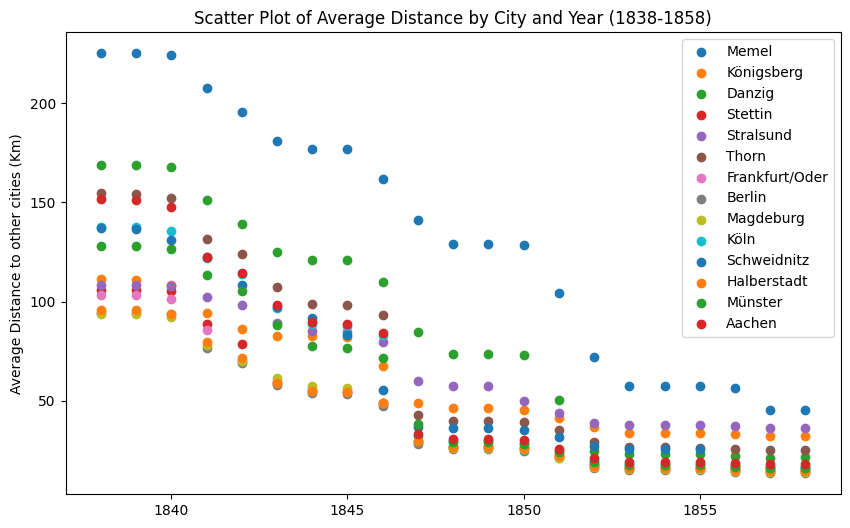

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator


# Filter the data for the years 1838 to 1858
plot_data_filtered = result_df[result_df['Year'].between(1838, 1858)]

# Exclude the 'Year' column for plotting
plot_data = plot_data_filtered.drop(columns='Year')

# Create a scatter plot
plt.figure(figsize=(10, 6))
for city in plot_data.columns:
    plt.scatter(plot_data_filtered['Year'], plot_data[city], label=city)

# Add labels and legend
#plt.xlabel('Year')
plt.ylabel('Average Distance to other cities (Km)')
plt.title('Scatter Plot of Average Distance by City and Year (1838-1858)')
plt.legend()

x_major_locator = MultipleLocator(5)
plt.gca().xaxis.set_major_locator(x_major_locator)

# Show the plot
plt.show()


In [ ]:
uploaded = files.upload()
zip_file_name = list(uploaded.keys())[0]
zip_content = uploaded[zip_file_name]

with zipfile.ZipFile(io.BytesIO(zip_content), 'r') as zip_ref:
    temp_dir = '/content/temp_extract'
    zip_ref.extractall(temp_dir)

shapefile_path = f'{temp_dir}/German_Union (GER)_1870_v.1.0.shp'
map1 = gpd.read_file(shapefile_path)

Saving map_prussia_1870.zip to map_prussia_1870.zip


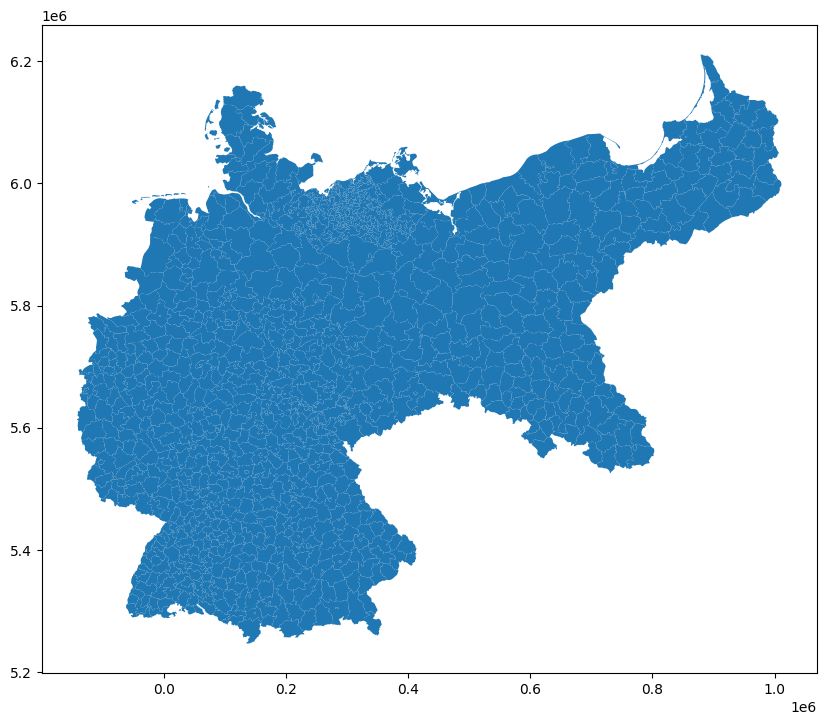

In [ ]:
map1.plot(figsize=(10, 10))
plt.show()

In [ ]:
map1

,AREA,PERIMETER,ID,LAND,NAME,STATUS,Rb,TYPE,geometry
0,797.203810,335.348398,11101,11100,ANHALT-DESSAU,TS,/,/,"MULTIPOLYGON (((320439.500 5769708.700, 319807..."
1,790.429135,303.104455,11301,11300,ANHALT-BERNBURG,TS,/,/,"MULTIPOLYGON (((335960.400 5761583.000, 335675..."
2,810.237301,332.961190,11201,11200,ANHALT-KOETHEN,TS,/,/,"MULTIPOLYGON (((314533.696 5762316.467, 313403..."
3,821.444932,287.859585,9002,9000,SCHOENINGENSCHER DISTRIKT,OM,/,/,"MULTIPOLYGON (((225602.800 5824421.800, 224809..."
4,1122.220448,239.808317,9003,9000,WOLFENBUETTELSCHER DISTRIKT,OM,/,/,"MULTIPOLYGON (((211347.580 5807066.124, 211067..."
...,...,...,...,...,...,...,...,...,...
1064,118.360151,85.882582,49,1000,DANZIG,/,DAN,2,"POLYGON ((740236.400 6034195.300, 739493.200 6..."
1065,1399.927854,209.788890,56,1000,KARTHAUS,/,DAN,0,"POLYGON ((725054.700 6035504.100, 725106.300 6..."
1066,7.378350,9.834624,95,1000,POTSDAM,/,POT,2,"POLYGON ((368949.000 5808038.200, 369367.800 5..."
1067,354.759502,98.014666,1030,1000,SANKT VITH,/,AAC,0,"POLYGON ((-111231.918 5616437.133, -111132.500..."


In [ ]:

# Set the CRS for gdfPlaces to EPSG 4326 (WGS 84)
# gdfPlaces = gdfPlaces.set_crs(epsg=4326)

# Transform gdfPlaces to the CRS of map1
# gdfPlaces = gdfPlaces.to_crs(map1.crs)

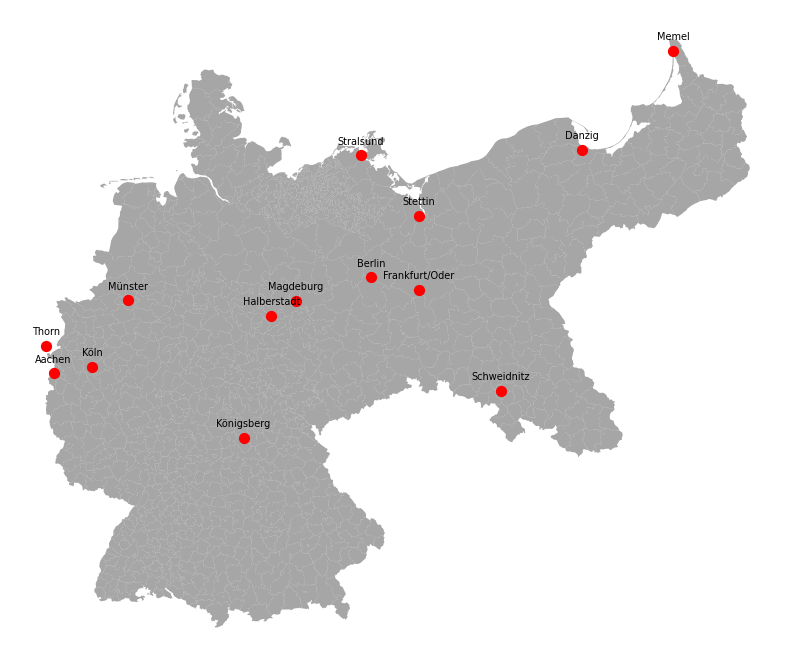

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Create your GeoDataFrame gdfPlaces and map1
# ... (your code to create gdfPlaces and map1)

# Transform map1 to the CRS of gdfPlaces
map1 = map1.to_crs(gdfPlaces.crs)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Turn off the axis
ax.axis('off')

# Plot map1 and gdfPlaces with pink color
map1.plot(ax=ax, alpha=0.7, color="gray")
gdfPlaces.plot(ax=ax, alpha=1, color="red", markersize=50, label="Cities")

# Add labels to the city points
for idx, row in gdfPlaces.iterrows():
    ax.annotate(row['City'], (row['Geometry'].x, row['Geometry'].y), fontsize=7,
                ha='center', va='bottom', xytext=(0, 7), textcoords='offset points')


# Show the plot
plt.show()


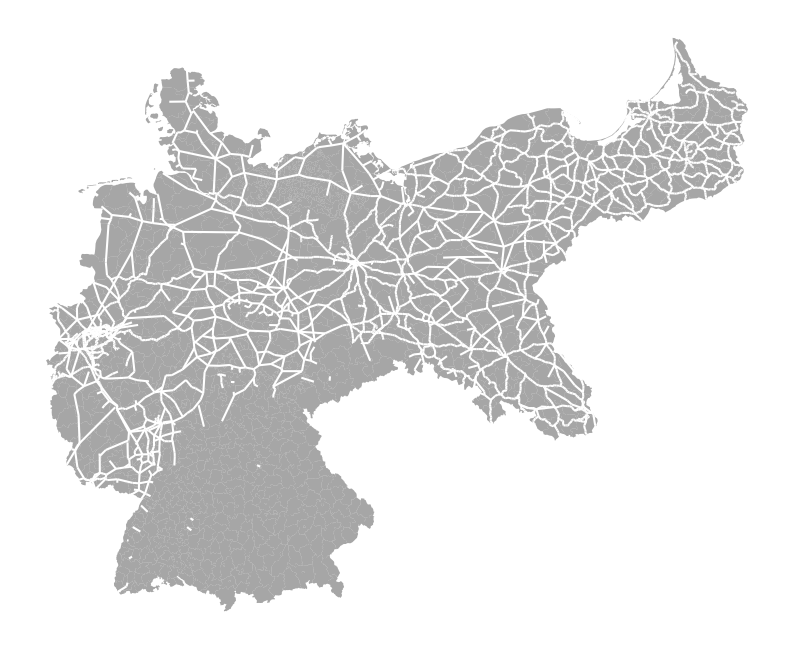

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Create your GeoDataFrame gdfPlaces and map1
# ... (your code to create gdfPlaces and map1)

# Transform map1 to the CRS of gdfPlaces
map1 = map1.to_crs(gdfRails.crs)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

ax.axis('off')

# Plot map1 and gdfPlaces with pink color
map1.plot(ax=ax, alpha=0.7, color="gray")
gdfRails.plot(ax=ax, alpha=1, color="white", markersize=50)




# Show the plot
plt.show()


# Model 4

In [ ]:
for index, row in x_df.iterrows():
    for column in x_df.columns:
        if pd.isna(row[column]):
            y_df.loc[index, column] = np.nan

for index, row in y_df.iterrows():
    for column in y_df.columns:
        if pd.isna(row[column]):
            x_df.loc[index, column] = np.nan

# Put all values from y_df into a single vector
y_values = y_df.values.flatten()

# Drop NaN values from the vector
y_values_cleaned = y_values[~np.isnan(y_values)]

# Put all values from y_df into a single vector
x_values = x_df.values.flatten()

# Drop NaN values from the vector
x_values_cleaned = x_values[~np.isnan(x_values)]

<ipython-input-70-72d16058bede>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_df.loc[index, column] = np.nan


In [ ]:
# Get the last row of y_df and x_df
last_row_y = y_df.iloc[-1]
last_row_x = x_df.iloc[-1]

# Put values from the last row of y_df into a single vector
y_values_last_row = last_row_y.values

# Drop NaN values from the vector
y_values_last_row_cleaned = y_values_last_row[~np.isnan(y_values_last_row)]

# Put values from the last row of x_df into a single vector
x_values_last_row = last_row_x.values

# Drop NaN values from the vector
x_values_last_row_cleaned = x_values_last_row[~np.isnan(x_values_last_row)]

In [ ]:
x_values_cleaned_with_const = sm.add_constant(x_values_last_row_cleaned)

# Perform OLS regression
model = sm.OLS(y_values_last_row_cleaned, x_values_cleaned_with_const)
results = model.fit()

# Get the regression summary
summary = results.summary()

# Print the summary
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     4.468
Date:                Mon, 14 Aug 2023   Prob (F-statistic):             0.0359
Time:                        14:59:59   Log-Likelihood:                 258.09
No. Observations:                 182   AIC:                            -512.2
Df Residuals:                     180   BIC:                            -505.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1090      0.014      7.919      0.0

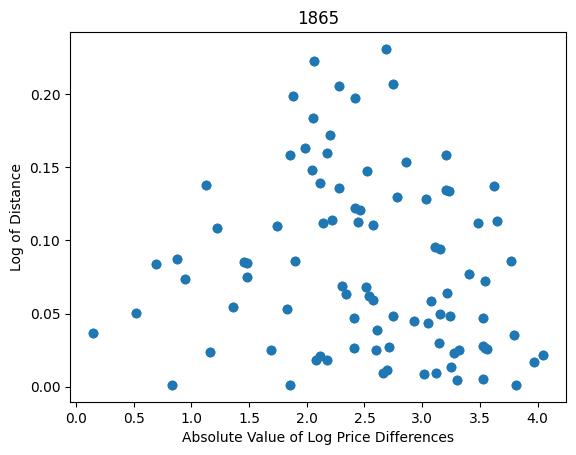

In [ ]:
plt.scatter(x_values_last_row_cleaned, y_values_last_row_cleaned)
plt.xlabel("Absolute Value of Log Price Differences")
plt.ylabel("Log of Distance")
plt.title("1865")
plt.show()

# Model 5

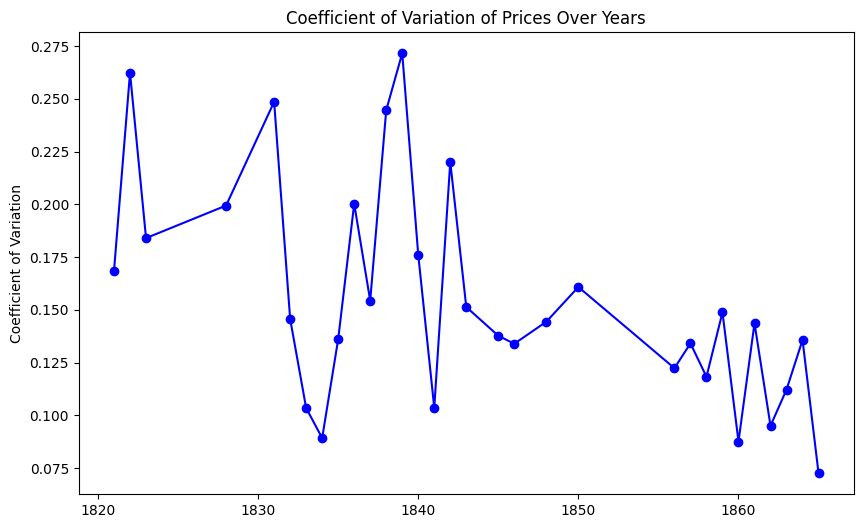

In [ ]:
coeff_of_var = ryhe.drop('Year', axis=1).apply(lambda row: row.std() / row.mean(), axis=1)

# Plot the coefficients of variation over the years
plt.figure(figsize=(10, 6))
plt.plot(ryhe['Year'], coeff_of_var, marker='o', linestyle='-', color='b')
plt.ylabel('Coefficient of Variation')
plt.title('Coefficient of Variation of Prices Over Years')

plt.show()

# Model 6

In [ ]:
individual_names = y_df.columns[1:]  # Exclude the "Year" column

# Reshape the DataFrame using melt and specify the individual names
new_y_df = pd.melt(y_df, id_vars=['Year'], value_vars=individual_names, var_name='city_pairs', value_name='price')

# Print the reshaped DataFrame
new_y_df

,Year,city_pairs,price
0,1821.0,Memel - Königsberg,0.037214
1,1822.0,Memel - Königsberg,0.109919
2,1823.0,Memel - Königsberg,0.316533
3,1828.0,Memel - Königsberg,0.223912
4,1831.0,Memel - Königsberg,0.195536
...,...,...,...
5637,1861.0,Aachen - Münster,0.154439
5638,1862.0,Aachen - Münster,0.010846
5639,1863.0,Aachen - Münster,0.053309
5640,1864.0,Aachen - Münster,0.044943


In [ ]:
x_df

,Year,Memel - Königsberg,Memel - Danzig,Memel - Stettin,Memel - Stralsund,Memel - Thorn,Memel - Frankfurt/Oder,Memel - Berlin,Memel - Magdeburg,Memel - Köln,...,Aachen - Stettin,Aachen - Stralsund,Aachen - Thorn,Aachen - Frankfurt/Oder,Aachen - Berlin,Aachen - Magdeburg,Aachen - Köln,Aachen - Schweidnitz,Aachen - Halberstadt,Aachen - Münster
0,1821.0,5.576363,4.132276,5.038797,5.203097,5.869526,5.093250,5.219758,5.416645,5.804659,...,5.283562,5.157540,2.312454,5.254394,5.119449,4.841130,2.978362,5.442918,4.728413,3.764555
1,1822.0,5.576363,4.132276,5.038797,5.203097,5.869526,5.093250,5.219758,5.416645,5.804659,...,5.283562,5.157540,2.312454,5.254394,5.119449,4.841130,2.978362,5.442918,4.728413,3.764555
2,1823.0,5.576363,4.132276,5.038797,5.203097,5.869526,5.093250,5.219758,5.416645,5.804659,...,5.283562,5.157540,2.312454,5.254394,5.119449,4.841130,2.978362,5.442918,4.728413,3.764555
7,1828.0,5.576363,4.132276,5.038797,5.203097,5.869526,5.093250,5.219758,5.416645,5.804659,...,5.283562,5.157540,2.312454,5.254394,5.119449,4.841130,2.978362,5.442918,4.728413,3.764555
10,1831.0,5.576363,4.132276,5.038797,5.203097,5.869526,5.093250,5.219758,5.416645,5.804659,...,5.283562,5.157540,2.312454,5.254394,5.119449,4.841130,2.978362,5.442918,4.728413,3.764555
11,1832.0,5.576363,4.132276,5.038797,5.203097,5.869526,5.093250,5.219758,5.416645,5.804659,...,5.283562,5.157540,2.312454,5.254394,5.119449,4.841130,2.978362,5.442918,4.728413,3.764555
12,1833.0,5.576363,4.132276,5.038797,5.203097,5.869526,5.093250,5.219758,5.416645,5.804659,...,5.283562,5.157540,2.312454,5.254394,5.119449,4.841130,2.978362,5.442918,4.728413,3.764555
13,1834.0,5.576363,4.132276,5.038797,5.203097,5.869526,5.093250,5.219758,5.416645,5.804659,...,5.283562,5.157540,2.312454,5.254394,5.119449,4.841130,2.978362,5.442918,4.728413,3.764555
14,1835.0,5.576363,4.132276,5.038797,5.203097,5.869526,5.093250,5.219758,5.416645,5.804659,...,5.283562,5.157540,2.312454,5.254394,5.119449,4.841130,2.978362,5.442918,4.728413,3.764555
15,1836.0,5.576363,4.132276,5.038797,5.203097,5.869526,5.093250,5.219758,5.416645,5.804659,...,5.283562,5.157540,2.312454,5.254394,5.119449,4.841130,2.978362,5.442918,4.728413,3.764555


In [ ]:
individual_names = x_df.columns[1:]  # Exclude the "Year" column

# Reshape the DataFrame using melt and specify the individual names
new_x_df = pd.melt(x_df, id_vars=['Year'], value_vars=individual_names, var_name='city_pairs', value_name='dist')

# Print the reshaped DataFrame
new_x_df

,Year,city_pairs,dist
0,1821.0,Memel - Königsberg,5.576363
1,1822.0,Memel - Königsberg,5.576363
2,1823.0,Memel - Königsberg,5.576363
3,1828.0,Memel - Königsberg,5.576363
4,1831.0,Memel - Königsberg,5.576363
...,...,...,...
5637,1861.0,Aachen - Münster,0.901967
5638,1862.0,Aachen - Münster,0.879669
5639,1863.0,Aachen - Münster,0.879669
5640,1864.0,Aachen - Münster,0.879669


In [ ]:
# Merge based on the columns "Year" and "city_pairs"
merged_df = pd.merge(new_y_df, new_x_df, on=["Year", "city_pairs"])

# Print the merged DataFrame
merged_df

,Year,city_pairs,price,dist
0,1821.0,Memel - Königsberg,0.037214,5.576363
1,1822.0,Memel - Königsberg,0.109919,5.576363
2,1823.0,Memel - Königsberg,0.316533,5.576363
3,1828.0,Memel - Königsberg,0.223912,5.576363
4,1831.0,Memel - Königsberg,0.195536,5.576363
...,...,...,...,...
5637,1861.0,Aachen - Münster,0.154439,0.901967
5638,1862.0,Aachen - Münster,0.010846,0.879669
5639,1863.0,Aachen - Münster,0.053309,0.879669
5640,1864.0,Aachen - Münster,0.044943,0.879669


In [ ]:
# Extract unique city names from the "city_pairs" column
unique_cities = set([city for pair in merged_df["city_pairs"] for city in pair.split(" - ")])
unique_cities

{'Aachen',
 'Berlin',
 'Danzig',
 'Frankfurt/Oder',
 'Halberstadt',
 'Köln',
 'Königsberg',
 'Magdeburg',
 'Memel',
 'Münster',
 'Schweidnitz',
 'Stettin',
 'Stralsund',
 'Thorn'}

In [ ]:
for city in unique_cities:
    merged_df[city] = merged_df["city_pairs"].apply(lambda x: 1 if city in x else 0)

# Print the resulting DataFrame
merged_df

,Year,city_pairs,price,dist,Königsberg,Danzig,Stralsund,Stettin,Magdeburg,Aachen,Thorn,Berlin,Halberstadt,Münster,Köln,Schweidnitz,Memel,Frankfurt/Oder
0,1821.0,Memel - Königsberg,0.037214,5.576363,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1822.0,Memel - Königsberg,0.109919,5.576363,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1823.0,Memel - Königsberg,0.316533,5.576363,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1828.0,Memel - Königsberg,0.223912,5.576363,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1831.0,Memel - Königsberg,0.195536,5.576363,1,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5637,1861.0,Aachen - Münster,0.154439,0.901967,0,0,0,0,0,1,0,0,0,1,0,0,0,0
5638,1862.0,Aachen - Münster,0.010846,0.879669,0,0,0,0,0,1,0,0,0,1,0,0,0,0
5639,1863.0,Aachen - Münster,0.053309,0.879669,0,0,0,0,0,1,0,0,0,1,0,0,0,0
5640,1864.0,Aachen - Münster,0.044943,0.879669,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [ ]:
max_value = y_df.drop(columns=['Year']).max().max()

print("Maximum value:", max_value)

Maximum value: 0.8346426674471453


In [ ]:
merged_df.dropna(inplace=True)

# Define the dependent variable
y = merged_df["price"]

# Define the independent variables (distance and city columns)
X = merged_df[["dist", "Königsberg", "Danzig", "Stralsund", "Stettin", "Magdeburg", "Aachen", "Thorn", "Berlin", "Halberstadt", "Münster", "Köln", "Schweidnitz", "Memel", "Frankfurt/Oder"]]

# Add a constant term
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     61.19
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          4.97e-161
Time:                        09:53:08   Log-Likelihood:                 3258.9
No. Observations:                5512   AIC:                            -6488.
Df Residuals:                    5497   BIC:                            -6389.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0444      0.005      8.

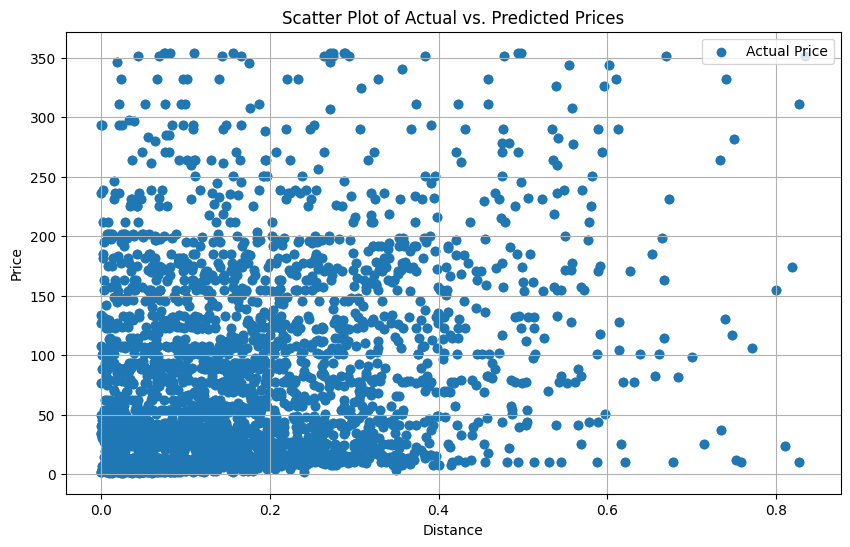

In [ ]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df["dist"], y, label="Actual Price")
plt.xlabel("Distance")
plt.ylabel("Price")
plt.title("Scatter Plot of Actual vs. Predicted Prices")
plt.legend()
plt.grid(True)
plt.show()

# Model 7

In [ ]:
# Get dummies for the "Year" column
year_dummies = pd.get_dummies(merged_df["Year"], prefix="Year")

# Merge the dummies back to the original DataFrame
merged_df = pd.concat([merged_df, year_dummies], axis=1)

# Print the modified DataFrame
merged_df

,Year,city_pairs,price,dist,Königsberg,Danzig,Stralsund,Stettin,Magdeburg,Aachen,...,Year_1856.0,Year_1857.0,Year_1858.0,Year_1859.0,Year_1860.0,Year_1861.0,Year_1862.0,Year_1863.0,Year_1864.0,Year_1865.0
0,1821.0,Memel - Königsberg,0.037214,5.576363,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1822.0,Memel - Königsberg,0.109919,5.576363,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1823.0,Memel - Königsberg,0.316533,5.576363,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1828.0,Memel - Königsberg,0.223912,5.576363,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1831.0,Memel - Königsberg,0.195536,5.576363,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5637,1861.0,Aachen - Münster,0.154439,0.901967,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5638,1862.0,Aachen - Münster,0.010846,0.879669,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
5639,1863.0,Aachen - Münster,0.053309,0.879669,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5640,1864.0,Aachen - Münster,0.044943,0.879669,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
merged_df.dropna(inplace=True)


y = merged_df["price"]

# Define the independent variables (all columns except "Year", "city_pairs", and "price")
X = merged_df.drop(columns=["Year", "city_pairs", "price"])

# Add a constant term
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     46.03
Date:                Wed, 16 Aug 2023   Prob (F-statistic):               0.00
Time:                        10:04:31   Log-Likelihood:                 3728.3
No. Observations:                5512   AIC:                            -7367.
Df Residuals:                    5467   BIC:                            -7069.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0693      0.007      9.